# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA AQUÍ TU RESPUESTA**
## Data Scientist

Los datos necesarios para poder entrenar el modelo de machine learning y concoer el valor de la propiedad sería. 

1. Tipo de propiedad
2. Ubicación (Zona)
3. Estrato socioeconmico
4. Si esta dentro de un conjunto residencial(Tiene zonas comunes-Cuales) si esta ubicado o una avenida princpal. 
5. Area Total
6. Acabados
7. Distribución 
8. Beneficios adicionales (Cuarto util o parqueaderos)
9. Numero de baños
10. Numero de alcobas
11. Tipo de cocina (Integral o no)
12. Numero de closet
13. Estudio.
14. Años  de antiguedad


Esta infomación sería la basica para entrenar un modelo, ya que ayudaría a saber con mas certeza el precio, debido a que las caracteristicas o beneficios del inmueble aporta a su valorzación econmica, es decir si un local esta ubicado en una avenida principal, su costo debería de ser mas alto, o si un un apartamento tiene una sola habitación es tipo loft, pero esta ubicado a pocas cuadras de un sistema de transporte como el metro o una estación de buses y tiene cerca supermercados e iglesias y cuenta con facil acceso al centro de la ciudad supone un costo mas alto, que aquellos que estan ubicados en las perferias. 


### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
properati= pd.read_csv ('DS_Proyecto_01_Datos_Properati.csv')
properati.shape # Numero de columnas y filas

(146660, 19)

In [3]:
properati.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
properati.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [5]:
properati['property_type'].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

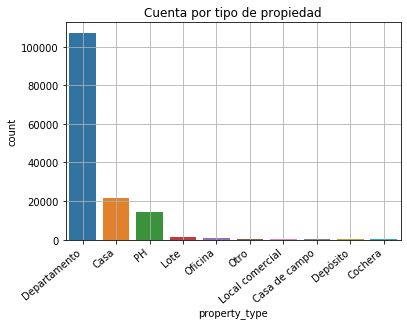

In [6]:
grafica = sns.countplot(x='property_type', data=properati,
              order = properati['property_type'].value_counts().index)
grafica.set_xticklabels(grafica.get_xticklabels(), rotation=40, ha='right')
#plt.tight_layout()
plt.title('Cuenta por tipo de propiedad')
plt.grid()
plt.show()


5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

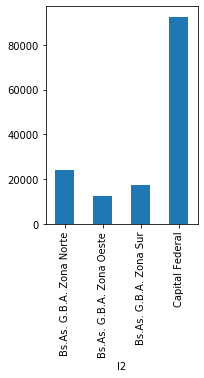

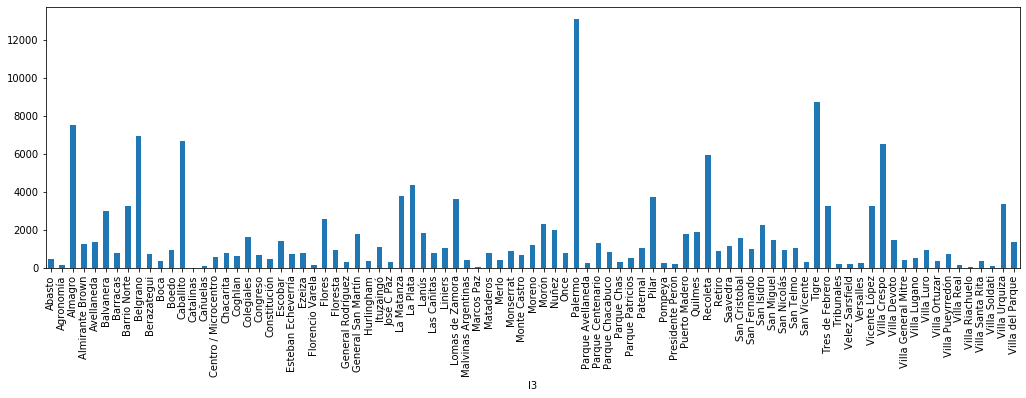

In [7]:
plt.subplot(1,2,1)
properati.groupby('l2')['l2'].count().plot(kind='bar')

plt.figure(figsize = (6.4*6,4.8))
plt.subplot(1,2,2)
properati.groupby('l3')['l3'].count().plot(kind='bar')

In [8]:
filtro1=properati[(properati.property_type.isin(['Departamento','Casa','PH']))& (properati.l2.isin(['Capital Federal']))]
filtro1.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [9]:
properati.describe() 

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [10]:
filtro1.describe()# Como no especifican con cual de los dos data sets se debe hacer, se dejan ambos

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [11]:
properati.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.975578,-0.010933,0.007618,0.019923,-0.019598,-0.004156,0.013393
lon,-0.975578,1.000000,-0.006931,-0.016905,-0.028612,-0.049097,-0.014388,0.009368
rooms,-0.010933,-0.006931,1.000000,0.869769,0.613308,0.081044,0.075012,0.351025
bedrooms,0.007618,-0.016905,0.869769,1.000000,0.588527,0.079229,0.072627,0.316192
bathrooms,0.019923,-0.028612,0.613308,0.588527,1.000000,0.061159,0.069361,0.556861
surface_total,-0.019598,-0.049097,0.081044,0.079229,0.061159,1.000000,0.430887,0.038727
surface_covered,-0.004156,-0.014388,0.075012,0.072627,0.069361,0.430887,1.000000,0.049136
price,0.013393,0.009368,0.351025,0.316192,0.556861,0.038727,0.049136,1.000000


In [12]:
filtro1.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.063281,0.002065,-0.009273,0.097078,-0.002239,0.000296,0.171693
lon,-0.063281,1.000000,0.059762,0.045443,0.079655,0.000084,0.006052,0.156230
rooms,0.002065,0.059762,1.000000,0.927300,0.603174,0.064774,0.066757,0.448318
bedrooms,-0.009273,0.045443,0.927300,1.000000,0.603968,0.064468,0.066174,0.413555
bathrooms,0.097078,0.079655,0.603174,0.603968,1.000000,0.056524,0.058192,0.587724
surface_total,-0.002239,0.000084,0.064774,0.064468,0.056524,1.000000,0.770742,0.049071
surface_covered,0.000296,0.006052,0.066757,0.066174,0.058192,0.770742,1.000000,0.054534
price,0.171693,0.156230,0.448318,0.413555,0.587724,0.049071,0.054534,1.000000


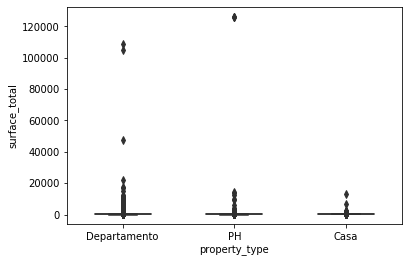

In [13]:
bplot = sns.boxplot(y='surface_total', x='property_type', 
                 data=filtro1, 
                 width=0.5,
                 palette="colorblind")

In [14]:
filtro2= filtro1.dropna()

In [15]:
filtro2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,76961.000000,76961.000000,76961.000000,76961.000000,76961.000000,76961.000000,76961.000000,7.696100e+04
mean,-34.598323,-58.434845,3.005223,1.998857,1.538610,113.103000,95.086940,2.587050e+05
std,0.023399,0.035745,1.306747,1.051604,0.838084,1015.102403,804.084792,3.248616e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.612203,-58.457343,2.000000,1.000000,1.000000,49.000000,44.000000,1.240000e+05
50%,-34.598713,-58.432771,3.000000,2.000000,1.000000,71.000000,63.000000,1.780000e+05
75%,-34.584093,-58.409599,4.000000,3.000000,2.000000,110.000000,95.000000,2.780000e+05
max,-34.535909,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [16]:
import pandas as pd

def remove_outliers(filtro2, q=0.05):
    upper = filtro2.quantile(1-q)
    lower = filtro2.quantile(q)
    mask = (filtro2 < upper) & (filtro2 > lower)
    return mask
mask = remove_outliers(filtro2['surface_total'], 0.1)
#print(t[mask])
filtro3 =filtro2[mask]
filtro3.shape

(60705, 19)

In [17]:
filtro3.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,60705.000000,60705.000000,60705.000000,60705.000000,60705.000000,60705.000000,60705.000000,6.070500e+04
mean,-34.598098,-58.435996,2.945342,1.945112,1.455432,80.419850,73.891558,2.187114e+05
std,0.023285,0.034982,0.973867,0.865427,0.682154,33.770206,145.168220,1.908997e+05
min,-34.695087,-58.530467,1.000000,0.000000,1.000000,40.000000,2.000000,1.080000e+04
25%,-34.611923,-58.458283,2.000000,1.000000,1.000000,53.000000,48.000000,1.340000e+05
50%,-34.598837,-58.433547,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,-34.583645,-58.412699,4.000000,3.000000,2.000000,100.000000,87.000000,2.590000e+05
max,-34.535909,-58.353930,21.000000,15.000000,14.000000,177.000000,13402.000000,3.243423e+07


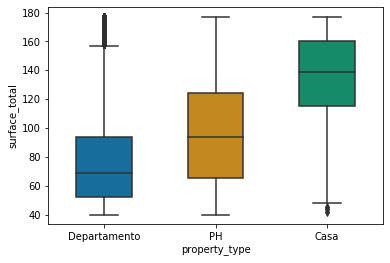

In [18]:
bplot = sns.boxplot(y='surface_total', x='property_type', 
                 data=filtro3, 
                 width=0.5,
                 palette="colorblind")

Las propiedades no pueden tener surface_covered mayor a surface_total. Si eso sucede, debes filtrar esas instancias.

In [19]:
mask = (filtro3['surface_total'] >= filtro3['surface_covered'])
filtro4 = filtro3[mask]
filtro4.shape
filtro4.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


#### Todo los mismo pero con price

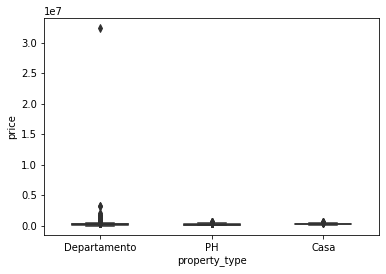

In [20]:
bplot = sns.boxplot(y='price', x='property_type', 
                 data=filtro4, 
                 width=0.5,
                 palette="colorblind")

In [21]:
import pandas as pd

def remove_outliers_price(filtro4, q=0.05):
    upper = filtro4.quantile(1-q)
    lower = filtro4.quantile(q)
    mask = (filtro4 < upper) & (filtro4 > lower)
    return mask
#print(remove_outliers_price(filro4['surface_total'], 0.1))
mask = remove_outliers(filtro4['price'], 0.1)
#print(t[mask])

filtro5 =filtro4[mask]

filtro5.shape

(47830, 19)

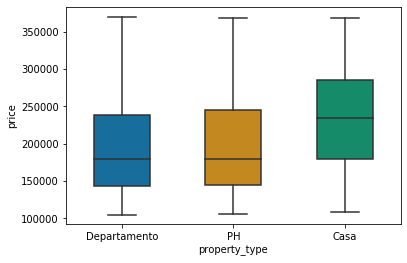

In [22]:
bplot = sns.boxplot(y='price', x='property_type', 
                 data=filtro5, 
                 width=0.5,
                 palette="colorblind")

In [23]:
filtro5.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,47830.000000,47830.000000,47830.000000,47830.000000,47830.000000,47830.000000,47830.000000,47830.000000
mean,-34.597272,-58.438060,2.937989,1.941606,1.390801,77.979615,68.538281,195753.547752
std,0.022355,0.033835,0.938980,0.846691,0.595571,29.280611,25.245085,64819.096257
min,-34.695087,-58.530467,1.000000,0.000000,1.000000,40.000000,2.000000,105048.000000
25%,-34.610355,-58.459759,2.000000,1.000000,1.000000,55.000000,49.000000,144000.000000
50%,-34.598525,-58.434577,3.000000,2.000000,1.000000,71.000000,63.000000,180000.000000
75%,-34.583698,-58.415250,3.000000,2.000000,2.000000,94.000000,81.000000,240000.000000
max,-34.535909,-58.353930,21.000000,11.000000,14.000000,177.000000,177.000000,369900.000000


In [24]:
filtro6= filtro5.drop(['lat','lon'],axis='columns')

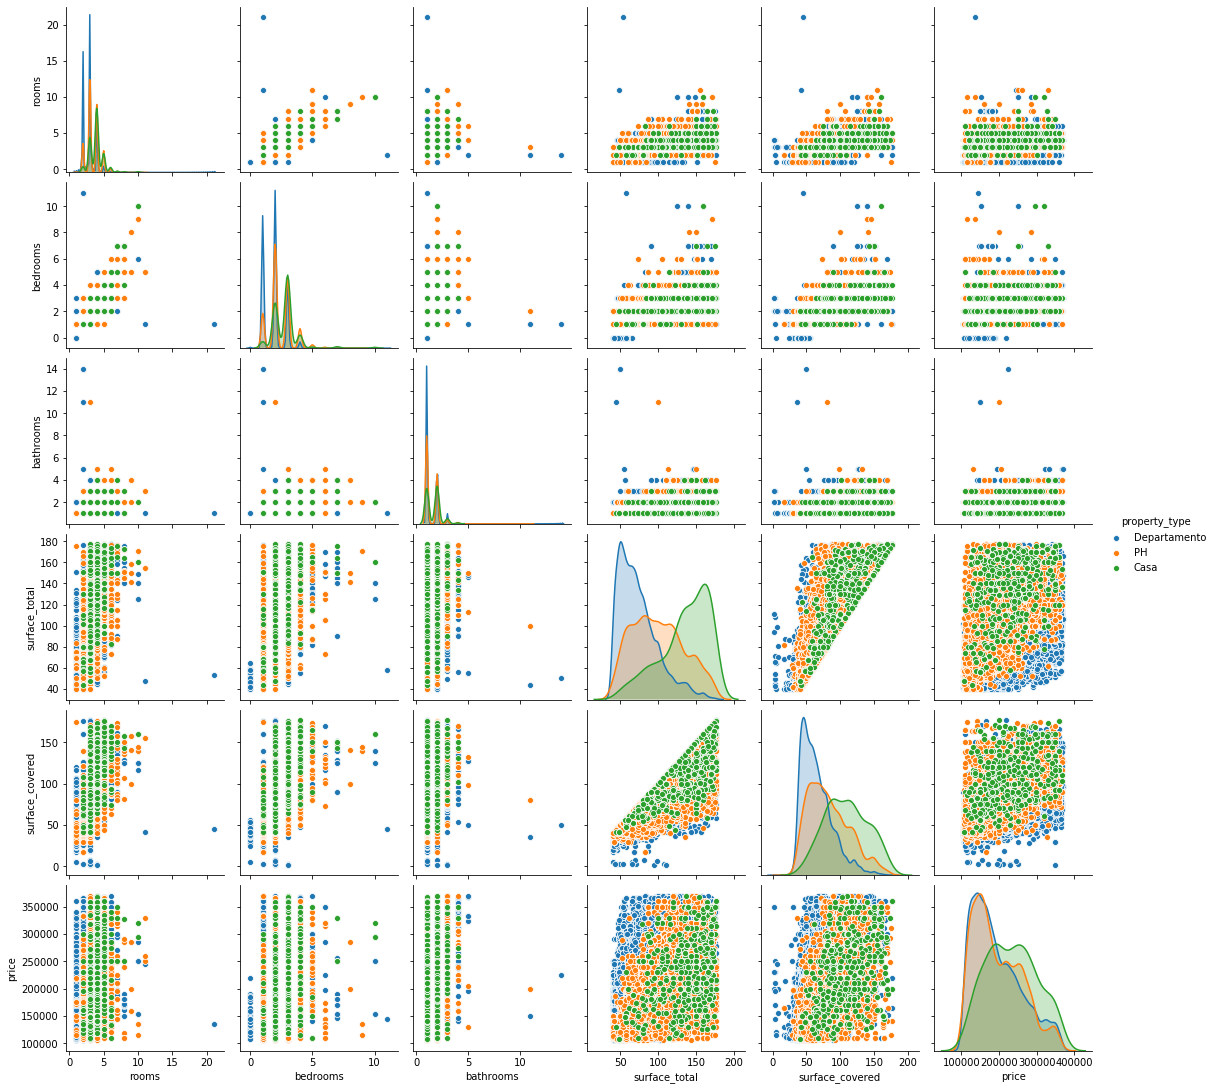

In [25]:
sns.pairplot(filtro6, hue = 'property_type')

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

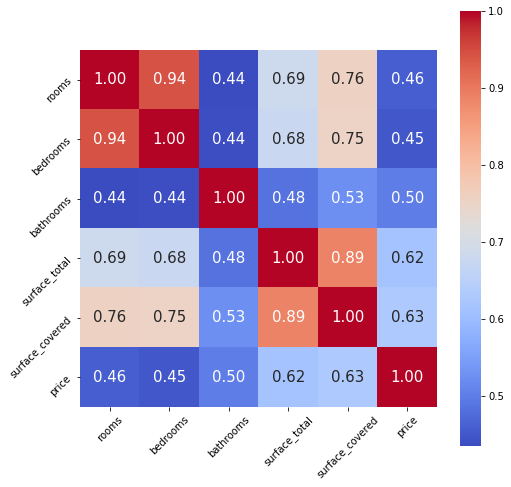

In [26]:
corr = filtro6.corr() # se usa para encontar a la correlaciòn 

plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
         
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

### 2.1 Desafío

In [27]:
# Zona que mas se demora en vender una propiedad

properati['created_on'] = pd.to_datetime(properati["created_on"], errors="coerce")
properati['end_date'] = pd.to_datetime(properati["end_date"], errors="coerce")
properati['resta'] = (properati['end_date']-properati['created_on']).dt.days
#print(properati['resta'])
properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,resta
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,67.0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,35.0
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,15.0
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,67.0
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta,146.0


In [80]:
print(properati.resta.max(),properati.property_type) 

434.0 0         Departamento
1                   PH
2                   PH
3                   PH
4                   PH
              ...     
146655    Departamento
146656    Departamento
146657    Departamento
146658    Departamento
146659    Departamento
Name: property_type, Length: 146660, dtype: object


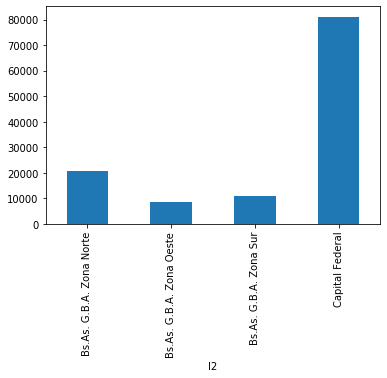

In [85]:
properati.groupby('l2')['resta'].count().plot(kind='bar')

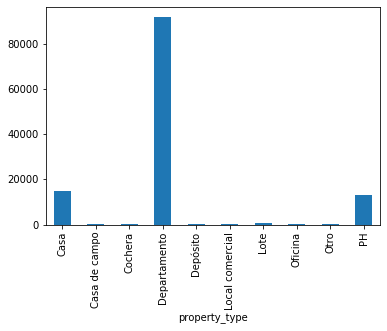

In [86]:
properati.groupby('property_type')['resta'].count().plot(kind='bar')

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [48]:
ml= pd.read_csv ('DS_Proyecto_01_Datos_Properati.csv')
ml.shape # Numero de columnas y filas

(146660, 19)

In [49]:
mlf1=ml[(ml.property_type.isin(['Departamento','Casa','PH']))& (ml.l2.isin(['Capital Federal']))]
mlf1.shape

(91485, 19)

In [50]:
mlf2 = mlf1[(mlf1['surface_total'] >= 15) & (mlf1['surface_total'] <= 1000)]
mlf2.shape

(82405, 19)

In [51]:
mlf3 = mlf2[(mlf2['price'] <= 4000000)]
mlf3.shape

(82373, 19)

In [52]:
mlf4= mlf3[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
mlf4.shape

(82373, 6)

In [53]:
mlf4.isna().sum()

rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64

In [54]:
mlf5= mlf4.dropna()

In [55]:
mlf5.shape

(81019, 6)

In [56]:
mlf5.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


In [57]:
mlf5.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
#Variable regresora
X= mlf5.drop('price', axis=1)
#Variable Predictora
y=mlf5['price']

In [60]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


In [61]:
from sklearn import linear_model
regresion = linear_model.LinearRegression()

In [62]:
regresion.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
properati_y_train_pred=regresion.predict(X_train)
properati_y_test_pred=regresion.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
print('Error Cuadratico medio fase entrenamiento: %.2f'
      %mean_squared_error(y_train,properati_y_train_pred))

print('Error cuadratico medio fse test : %.2f'
      %mean_squared_error(y_test,properati_y_test_pred))

Error Cuadratico medio fase entrenamiento: 39670215566.79
Error cuadratico medio fse test : 40985745552.33


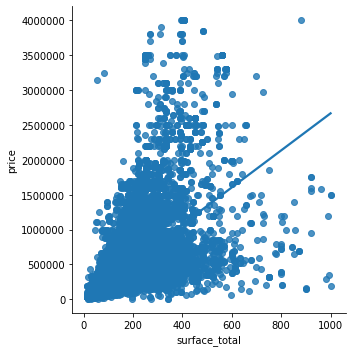

In [65]:
from seaborn import lmplot
gr=lmplot('surface_total', 'price', data=mlf5, ci=None)


## Evaluación de benchmark y evaluación del modelo

Tenindo en cuenta los modelos revisados en clase y según los resultados arrojados por la metrica MSE la regresión aplicada bajo estos parámetros no es muy acertada. Este resultado de entrenamiento y test da muy alejado de la media.

Elegí el MSE ya que buscando en varias fuentes en google esta es la métrica mas simple para la evalución de una regresión. sin embrago no es la más útil, lo elegi ya que una de sus ventajas es que si puede ser de gran utilidad cuando tenemos valores inesperados y es una evalución mas flexible que las otras. 

El RMSE es una metrica parecida al MSE (Es simplemente la raíz cuadrada del anterior), la unica diferencia es que nos permite visulizar mejor y mas rapidamente cuan alejado esta el error de la media. Tal como lo muestro, a continuación: 


In [66]:
rmse_test= np.sqrt(mean_squared_error(y_test,properati_y_test_pred))
rmse_train= np.sqrt(mean_squared_error(y_train,properati_y_train_pred))

print('Raiz cuadrada del error cuadratico medio fase entranamiento',rmse_train)
print ('Raiz Cuadrada del error cuatratico medio fase test', rmse_test)

Raiz cuadrada del error cuadratico medio fase entranamiento 199173.83253528475
Raiz Cuadrada del error cuatratico medio fase test 202449.36540361575


Como se puede ver los numeros 199.173 USD y 202.449 USD (extraidos con el RMSE) son mas faciles de interpertar con respecto al valor medio del precio de 263.772 USD que mirando el MSE, esto nos indica que hasta el momento esta regresión nos da numeros bastante alejados de la media de los datos de precio. Se deberian de evaluar otras regresiones y empezar a estimar cual está mas aproximada. 

## Entrenando los modelos (KNN, Arbol de Regresión, Regresión Lineal)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=20, random_state=42) 
knn_regressor = KNeighborsRegressor(n_neighbors=4)

In [70]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [71]:
print(linear_model.coef_, linear_model.intercept_)

[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
  1.07004571e+02] -56646.24807942542


Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361575


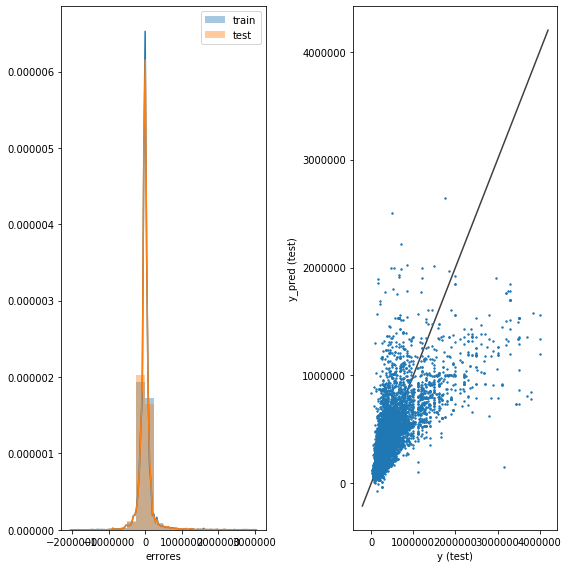

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 55906.294198892916
Raíz del error cuadrático medio en Test: 150455.20183513418


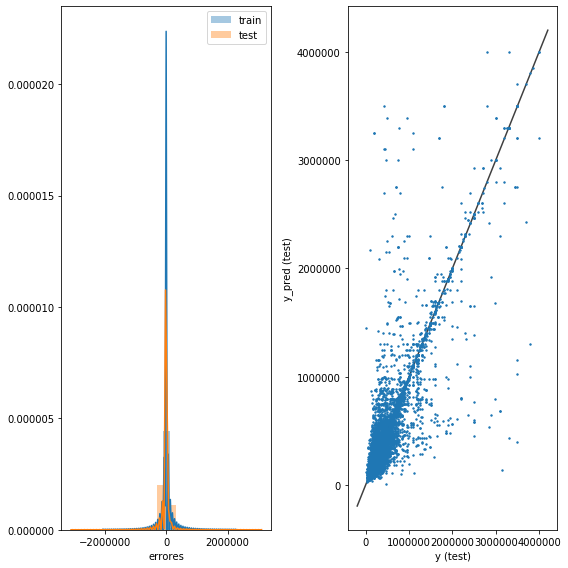

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 114297.26298367885
Raíz del error cuadrático medio en Test: 153695.14678737795


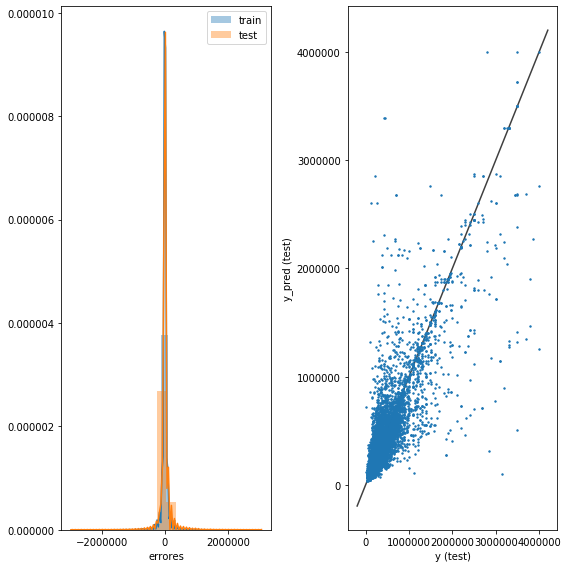

In [73]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,8))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [74]:
from sklearn.neighbors import KNeighborsRegressor

# Definimos las listas vacias para los valores de accuracy deseados
lista_MSE_entrenamiento_vecinos = []
lista_MSE_test_vecinos = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    vecinos_regresion= KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    vecinos_regresion.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_entrenamiento_pred_vecinos = vecinos_regresion.predict(X_train)
    MSE_entrenamiento_vecinos = mean_squared_error(y_train,y_entrenamiento_pred_vecinos)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_vecinos = vecinos_regresion.predict(X_test)
    MSE_test_vecinos = mean_squared_error(y_test, y_test_pred_vecinos)
    
    # Agregar la información a las listas
    lista_MSE_entrenamiento_vecinos.append(MSE_entrenamiento_vecinos)
    lista_MSE_test_vecinos.append(MSE_test_vecinos)

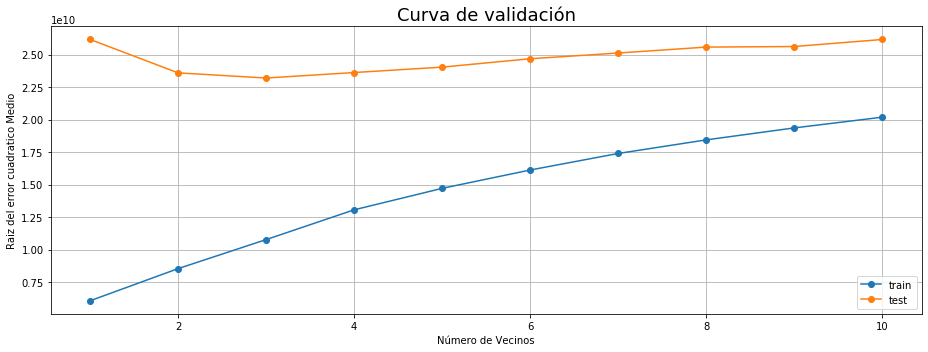

In [75]:
fig,ax= plt.subplots(figsize= (13,5))
plt.plot(k_vecinos,lista_MSE_entrenamiento_vecinos,'o-',label='train')
plt.plot(k_vecinos,lista_MSE_test_vecinos,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Raiz del error cuadratico Medio')
plt.title('Curva de validación', size= 18)
plt.grid()
plt.tight_layout()

## Entrenando un modelo de Árbol

In [76]:
from sklearn.tree import DecisionTreeRegressor

# Definimos las listas vacias para los valores de accuracy deseados
lista_MSE_train_arbol2 = []
lista_MSE_test_arbol2 = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    arbol_regresion2 = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    arbol_regresion2.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_entrenamiento_pred_arbol = arbol_regresion2.predict(X_train)
    MSE_entrenamiento_arbol = mean_squared_error(y_train, y_entrenamiento_pred_arbol)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_arbol = arbol_regresion2.predict(X_test)
    MSE_test_arbol = mean_squared_error(y_test, y_test_pred_arbol)
    
    # Agregar la información a las listas
    lista_MSE_train_arbol2.append(MSE_entrenamiento_arbol)
    lista_MSE_test_arbol2.append(MSE_test_arbol)

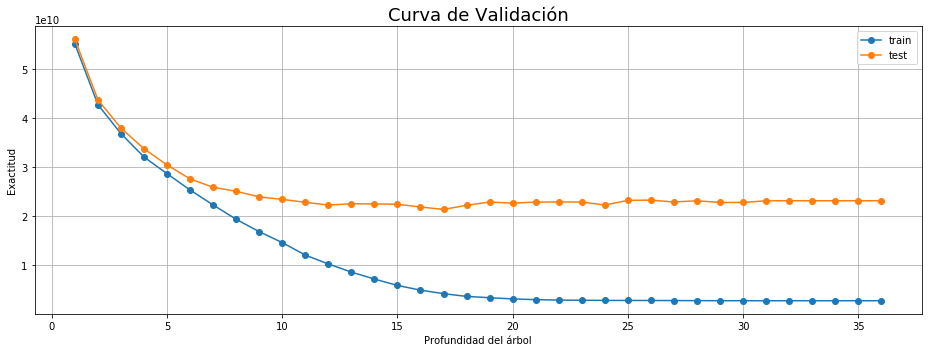

In [77]:
fig,ax= plt.subplots(figsize= (13,5))
plt.plot(max_depths,lista_MSE_train_arbol2,'o-',label='train' )
plt.plot(max_depths,lista_MSE_test_arbol2,'o-',label='test')
plt.legend()
plt.title('Curva de Validación', size= 18)
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')
plt.grid()
plt.tight_layout()

# Escogiendo el mejor modelo

Realizando un análisis de las gráficas obtenidas y revisando la curva de validación de los datos jugando con diferentes hiperparametros, me doy cuenta de que el valor óptimo para los dos modelos (KNN y Arboles de decisión) aplicados a la regresión debería de ser: 

1. Para KNN: Entre 3 y 4 vecinos
2. Para Arboles de decisión: 15 y 17 hojas del árbol. 

Con estos parámetros al realizar la comparación de la raíz cuadrática media vemos que el que menor valor tiene es el árbol de decisión (con RMSE de 55.906 para train y para test ), sin embargo pienso que al ser un problema más de regresión sería importante evaluarlo contra otros métodos de regresión más complejos que la lineal con la que hicimos el modelo de benchmark. 
Con estos parámetros al realizar la comparación de la raíz cuadrática media vemos que el que menor valor tiene es el árbol de decisión (con RMSE de 55.906 para train y para test 150.455), sin embargo, pienso que al ser un problema más de regresión sería importante evaluarlo contra otros métodos de regresión más complejos que la lineal con la que hicimos el modelo de benchmark. 

También es importante tener en cuenta que la forma en la que se hizo se hicieron los filtros, pudo influir en los resultados del modelo, al no tener toda la data limpia para el proceso de train y test.

Para tener unos datos un poco más acertados sobre esto se recomienda primero limpiar el data set de los datos, es decir todo aquello que esta vacío, que tiene datos incorrectamente marcadas por errores de digitación y en el momento de realizar el filtro para los datos de test y de train probar con otros porcentajes, como 60, 40 (en el momento de hacer la división de los datos) y de esta manera obtener diferentes resultados y evaluar qué resultado puede estar más ajustado a la predicción del precio. 

Por último, es importante hacer una caracterización y separación por cada uno de los tipos de propiedad y descripción de la propiedad (Beneficios que tiene la propiedad), ya que dependiente de esta información la predicción se debe de ajustar mucho más. 

Es decir, tener una columna que mencione si tiene garaje o no, si tiene acabados de lujo, si su cocina es integral, si el lugar es cerca de supermercados, iglesias, escuelas y transporte público, ya que el precio va ir directamente ligado a las bondades que tiene la propiedad, para ello la sección de descripción la dividiría por columnas en características y la llenaría con variables booleanas para coincidir con estas variables el precio de la propiedad y así obtener un modelo más robusto y preciso en el momento de realizar la predicción del precio de una propiedad.
